In [ ]:
# importing required primary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# reading the csv file
df = pd.read_csv('/content/Restaurant_Reviews.tsv',sep='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
# getting info of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# removing the repeated or duplicate values
df = df.drop_duplicates(keep = 'last')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  996 non-null    object
 1   Liked   996 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 23.3+ KB


In [ ]:
df['Review'][900]

'Spend your money elsewhere.'

In [ ]:
df['Liked'][900]

0

In [ ]:
df['Review'][500]

"I also had to taste my Mom's multi-grain pumpkin pancakes with pecan butter and they were amazing, fluffy, and delicious!"

In [ ]:
df['Liked'][500]

1

In [ ]:
# finding number of unique values
data_frame=df['Liked'].value_counts().to_frame()
data_frame

,Liked
1,499
0,497


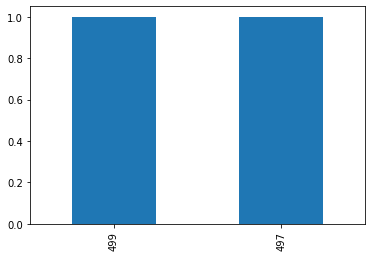

In [ ]:
# pandas plotting
data_frame['Liked'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


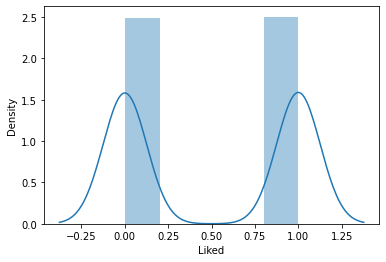

In [ ]:
# data visualization using seaborn distplot
sns.distplot(df['Liked'])

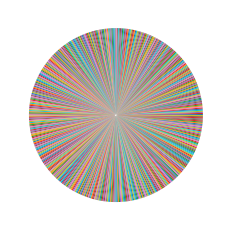

In [ ]:
# data visualization using matplotlib 
# this piechart is showing the all 997 values with their respective values (0&1)
import matplotlib.pyplot as plt
x = df['Review'].values
y = df['Liked'].values
plt.pie(y)
plt.show()

In [ ]:
# rows - 996  and  columns - 2
df.shape

(996, 2)

In [ ]:
# splitting the date into training data and testing data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape

(747,)

In [ ]:
x_test.shape

(249,)

In [ ]:
# using countvectorizer coverting the text data to numerical values 
# that is it involves removing of stop words and counting the occurence of each useful word and storing them

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [ ]:
x_train_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_test_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_train_vect.shape

(747, 1531)

In [ ]:
x_test_vect.shape

(249, 1531)

In [ ]:
#METHOD 1
# using support vector classifier
from sklearn.svm import SVC
model1 = SVC()
model1.fit(x_train_vect,y_train)

SVC()

In [ ]:
# predicted values
y_pred1 = model1.predict(x_test_vect)
y_pred1

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1])

In [ ]:
# finding accuracy of the model 
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.7269076305220884

In [ ]:
# METHOD 2
# combining countvectorizer and support vector classifier using pipeline
from sklearn.pipeline import make_pipeline
model2 = make_pipeline(CountVectorizer(),SVC())

model2.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [ ]:
# predicted values
y_pred2 = model2.predict(x_test)
y_pred2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [ ]:
# finding accuracy of the model
accuracy_score(y_pred2,y_test)

0.8152610441767069

In [ ]:
# METHOD 3 
# using Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [ ]:
# predicted values
y_pred3 = model3.predict(x_test_vect)
y_pred3

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [ ]:
# finding accuracy of the model
accuracy_score(y_pred3,y_test)

0.7469879518072289

In [ ]:
# METHOD 4
# combining count vectorizer and Naive Bayes using pipeline
from sklearn.pipeline import make_pipeline
model4 = make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
# predicted values
y_pred4 = model4.predict(x_test)
y_pred4

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [ ]:
# finding accuracy of the model
accuracy_score(y_pred4,y_test)

0.7791164658634538

In [ ]:
# THE ACCURACIES OF ALL MODELS CREATED 

import pandas as pd

accuracy = [['SVC',0.7269076305220884],['SVC Pipeline',0.8152610441767069]
               ,['MultinomialNB',0.7469879518072289],['MultinomialNB Pipeline',0.7791164658634538]]

accuracy_df = pd.DataFrame(accuracy,columns = ['Model','Accuracy'])
accuracy_df = accuracy_df.style.set_properties(**{'text-align':'left'})
accuracy_df = accuracy_df.set_table_styles([dict(selector = 'th',props=[('text-align','center')])])

accuracy_df

,Model,Accuracy
0,SVC,0.726908
1,SVC Pipeline,0.815261
2,MultinomialNB,0.746988
3,MultinomialNB Pipeline,0.779116


In [ ]:
# pickling 
# using joblib for saving the model having highest accuracy
import joblib
joblib.dump(model2,'restaurant_reviews')

['restaurant_reviews']

In [ ]:
# loading the model
import joblib
reload_model = joblib.load('restaurant_reviews')

In [ ]:
# predicting the values with highest accuracy model after pickling
reload_model.predict(['good'])

array([1])

In [ ]:
reload_model.predict(['not so good'])

array([0])

In [ ]:
reload_model.predict(['thankyou'])

array([1])

In [ ]:
reload_model.predict(['not worth'])

array([0])

In [ ]:
# creating the webapp using streamlit
# installing streamlit
!pip install streamlit --quiet

     |████████████████████████████████| 10.1 MB 27.1 MB/s 
     |████████████████████████████████| 111 kB 64.3 MB/s 
     |████████████████████████████████| 181 kB 66.5 MB/s 
     |████████████████████████████████| 77 kB 5.6 MB/s 
     |████████████████████████████████| 4.3 MB 68.2 MB/s 
     |████████████████████████████████| 164 kB 66.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 131 kB 60.7 MB/s 
     |████████████████████████████████| 130 kB 61.3 MB/s 
     |████████████████████████████████| 793 kB 56.2 MB/s 
     |████████████████████████████████| 428 kB 60.3 MB/s 
     |████████████████████████████████| 381 kB 61.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 

In [ ]:
# using file handiling in python 
# write mode for writing the reviews
# button - on click displays the output as 0 or 1
%%writefile reviews.py
import streamlit as st
import joblib
from PIL import Image
image = Image.open('/content/photo.jpg')
st.image(image, caption='Artificial Intelligence and Machine learning')
print()

st.title('SENTIMENT ANALYSIS')
reload_model = joblib.load('restaurant_reviews')

ip = st.text_input("Give your expensive review : ")
op = reload_model.predict([ip])

if st.button('PREDICT'):
  st.text('OUTPUT ')
  st.text('1 - POSITIVE REVIEW')
  st.text('0 - NEGATIVE REVIEW')
  st.title(op[0])
  

Overwriting reviews.py


In [ ]:
# using local tunnel tool for creating a URL to webapp
!streamlit run reviews.py & npx localtunnel --port 8501

2022-05-28 12:32:11.460 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 2.593s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.85.226.213:8501

your url is: https://fair-turtles-stop-34-85-226-213.loca.lt



  Stopping...
^C
